In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import pandas as pd
import re

from nltk.stem import RSLPStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim

nltk.download('rslp')

[nltk_data] Downloading package rslp to /home/vinicius/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [2]:
STOPWORDS_FILE = None

with open('./stop_words.txt', 'r') as f:
    STOPWORDS_FILE = list(map(lambda x : x.replace('\n', ''), f.readlines()))
STOPWORDS_FILE

['a',
 'acerca',
 'adeus',
 'agora',
 'ainda',
 'alem',
 'algmas',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'ano',
 'anos',
 'antes',
 'ao',
 'aonde',
 'aos',
 'apenas',
 'apoio',
 'apontar',
 'apos',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'boas',
 'bom',
 'bons',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprido',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujas',
 'cujo',
 'cujos',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquelas',
 'daquele',
 'daqueles',
 'dar',
 'das',
 'de',
 'debaixo',
 'dela',
 'delas',
 'dele',
 'deles',
 'demais',
 'dentro',
 'depois',
 'desde',
 'desligado',
 'dessa',
 'dessas',
 'desse',
 'desses',
 'desta',
 'destas',
 'deste',
 'destes',
 'deve',
 'devem',
 'deverá',
 'dez',
 

In [3]:
STOPWORDS_PORTUGUESE = list(set(STOPWORDS_FILE + stopwords.words('portuguese') + ['aê', 'ei', 'ô', 'au', 'ai', 'oi', 'ó', 'oh', 'ah', 'tá', 'tô', 'tamo', 'bora', 'uh', 'cê', 'nóis','iê', 'yeah', 'vou', 'pra', 'tic', 'prá', 'oba', 'êh', 'ra', 'pa', 'la', 'tcha', 'tchu']))

In [4]:
stopwords.words('portuguese')

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [5]:
STOPWORDS_PORTUGUESE

['mês',
 'perto',
 'tem',
 'há',
 'adeus',
 'esteve',
 'à',
 'sempre',
 'houveria',
 'obrigada',
 'tém',
 'num',
 'e',
 'estivemos',
 'somente',
 'entre',
 'conhecido',
 'catorze',
 'nem',
 'queres',
 'fazia',
 'estou',
 'ao',
 'outros',
 'mil',
 'havia',
 'cima',
 'oi',
 'na',
 'seremos',
 'forem',
 'obrigado',
 'estejam',
 'se',
 'vossos',
 'tentar',
 'cê',
 'conselho',
 'você',
 'ver',
 'primeiro',
 'tínhamos',
 'tá',
 'hora',
 'lado',
 'vem',
 'estão',
 'apenas',
 'sim',
 'me',
 'neste',
 'estejamos',
 'podem',
 'foi',
 'menos',
 'dá',
 'posição',
 'dizem',
 'fôramos',
 'estas',
 'vinte',
 'nestas',
 'fazes',
 'primeiros',
 'como',
 'demais',
 'estivermos',
 'vocês',
 'direita',
 'hajamos',
 'com',
 'dessa',
 'esse',
 'vosso',
 'mal',
 'terei',
 'sob',
 'la',
 'aonde',
 'serão',
 'prá',
 'longe',
 'os',
 'nao',
 'estar',
 'todo',
 'possivelmente',
 'daquele',
 'nesses',
 'duas',
 'nove',
 'fosse',
 'logo',
 'primeira',
 'cada',
 'sétima',
 'lhes',
 'dezasseis',
 'final',
 'breve',


In [6]:
SONGS_DIR = './songs/'
START_YEAR = 1990
END_YEAR = 2023
FILE_PATHS = [os.path.join(SONGS_DIR, str(year)+'.csv') for year in np.arange(START_YEAR, END_YEAR+1)]
COLUMN_NAMES = ['title', 'artist', 'lyrics']

df_dict = {k:[] for k in COLUMN_NAMES}
df = pd.DataFrame()

for i, file_path in enumerate(FILE_PATHS):
    file_df = pd.read_csv(file_path)
    file_df['year'] = pd.Series([START_YEAR+i for _ in range(file_df.shape[0])])
    df = pd.concat([df, file_df])

In [7]:
def count_songs_per_year(df):
    return df['year'].value_counts().index, df['year'].value_counts().values

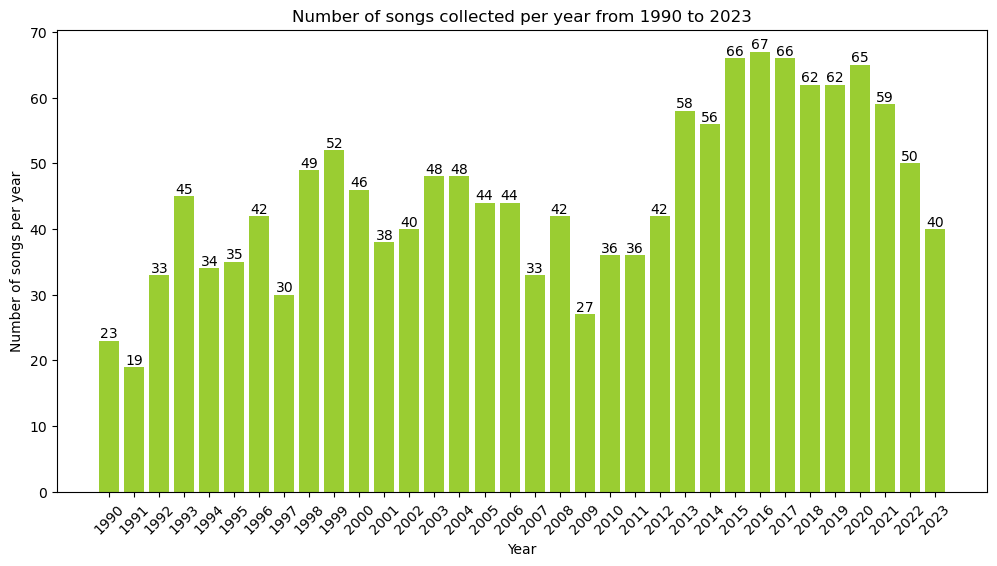

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
years, counts = count_songs_per_year(df)
ax.set_title('Number of songs collected per year from 1990 to 2023')
ax.set_xticks(years,labels=years,rotation=45)
bars = ax.bar(height=counts,x=years,color='yellowgreen')
ax.bar_label(bars, labels=counts)
ax.set_xlabel('Year')
ax.set_ylabel('Number of songs per year')
plt.show()

In [9]:
STEMMER = RSLPStemmer()
TOKERNIZER = RegexpTokenizer(re.compile(r'\w+'))

def clean_lyrics(lyrics: str) -> str:
    lyrics = re.sub('\n+', ' ', lyrics)
    lyrics = lyrics.lower()
    return ' '.join([STEMMER.stem(word) for word in TOKERNIZER.tokenize(lyrics) if word not in STOPWORDS_PORTUGUESE and not re.match(r'\w*\d+', word) and not re.match(r'(a|o|e|i|u|ô|ê|l)+h*', word)])

df['clean_lyrics'] = df['lyrics'].apply(clean_lyrics)

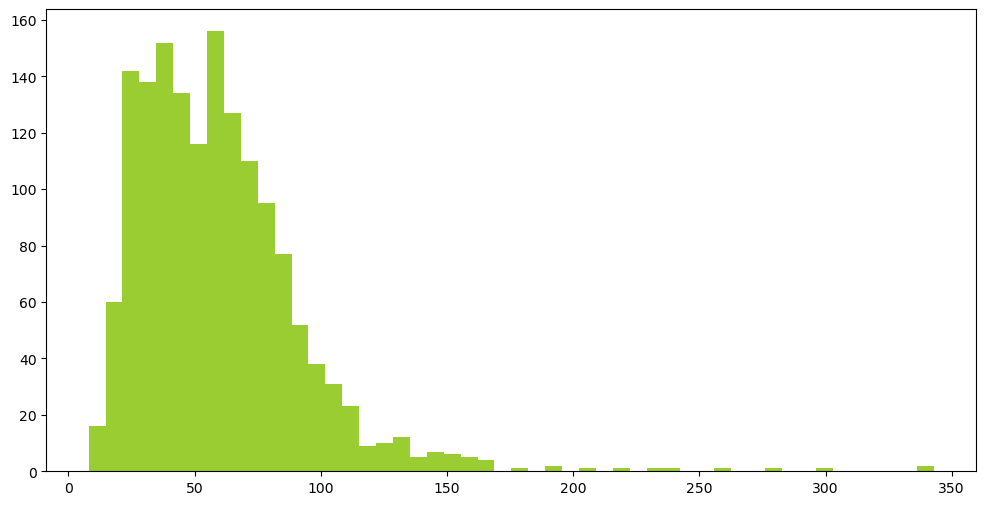

In [10]:
def plot_histogram(series):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.hist(series, bins=50, color='yellowgreen')
    plt.show()

clean_lyrics_len = df['clean_lyrics'].apply(lambda x: len(x.split()))
plot_histogram(clean_lyrics_len)

In [11]:
VECTORIZER = CountVectorizer(max_df=0.9, min_df=0.005)
tf = VECTORIZER.fit_transform(df['clean_lyrics']).toarray()
tf_feature_names = VECTORIZER.get_feature_names_out()
tf.shape

(1537, 811)

In [12]:
pd.DataFrame(tf, columns=tf_feature_names)

,baby,bagunç,bail,baix,bal,balanç,banc,band,banh,bar,...,víci,víde,xing,you,zon,zé,águ,álcool,últ,únic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Choosing the best LDA model using coherence

In [13]:
random_state = 69420

def calculate_coherence_scores(coherence_metric='c_v', topic_model='lda'):
    coherence_scores = {}
    for n_topics in np.arange(3,13):
        model = None
        if topic_model == 'lda':
            model = LatentDirichletAllocation(n_components=n_topics, random_state=random_state)
        elif topic_model == 'nmf':
            model = NMF(n_components=n_topics, random_state=random_state, max_iter=500)
        else:
            raise RuntimeError(f'Undefined model {topic_model}')
        model = model.fit(tf)
        if coherence_metric == 'u_mass':
            coherence_scores[n_topics] = metric_coherence_gensim(measure='u_mass', dtm=tf, vocab=tf_feature_names, topic_word_distrib=model.components_, return_mean=True)
        else:
            coherence_scores[n_topics] = metric_coherence_gensim(measure=coherence_metric, dtm=tf, vocab=tf_feature_names, topic_word_distrib=model.components_, return_mean=True, texts=df['clean_lyrics'].apply(lambda x: x.split()).to_list())
    return coherence_scores

In [14]:
calculate_coherence_scores(coherence_metric='c_v', topic_model='nmf')

{3: 0.32824529993484625,
 4: 0.33744945406794635,
 5: 0.32784087248597416,
 6: 0.31234428078635584,
 7: 0.29518294622382035,
 8: 0.3065121103605706,
 9: 0.30351005265288444,
 10: 0.30018433685333706,
 11: 0.30254960492103844,
 12: 0.30310209297826}

In [15]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [16]:
model_nmf = NMF(n_components=4, random_state=random_state)
model_nmf.fit(tf)
display_topics(model_nmf, tf_feature_names, 10)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights
0,gent,5.0,danç,9.9,deix,9.3,beij,7.1
1,fic,4.7,mund,1.0,vid,3.5,boc,2.6
2,mim,4.5,pi,0.8,viv,1.4,beb,1.5
3,coraçã,4.5,beij,0.8,deu,1.2,comig,1.4
4,pass,3.9,dig,0.7,chor,1.1,quer,1.3
5,fal,3.3,mex,0.5,sofr,0.8,peg,1.0
6,volt,2.6,águ,0.5,fal,0.8,diss,0.8
7,vid,2.3,menin,0.5,pens,0.7,namor,0.7
8,viv,2.2,comig,0.4,tom,0.6,jeit,0.7
9,mund,2.2,danc,0.4,quis,0.6,vam,0.5


In [17]:
columns = ['relacionamento', 'dança', 'término', 'amor']

In [18]:
songs_by_topic = pd.DataFrame(model_nmf.transform(tf), columns=columns)
df = df.join(songs_by_topic)

In [19]:
def plot_topics_by_year(df, year_range, topic_columns, aggregate):
    fig, ax = plt.subplots(figsize=(16,8))
    ax.set_title('Mean popularity of the 9 different topics from 1990 to 2023')
    ax.set_xlabel('Year')
    ax.set_ylabel('Mean topic popularity')
    ax.set_xticks(year_range, year_range, rotation=45)
    for topic in topic_columns:
        ax.plot(year_range,df[[topic, 'year']].groupby('year').aggregate(aggregate), 'o-')
    plt.legend(topic_columns)
    plt.show()

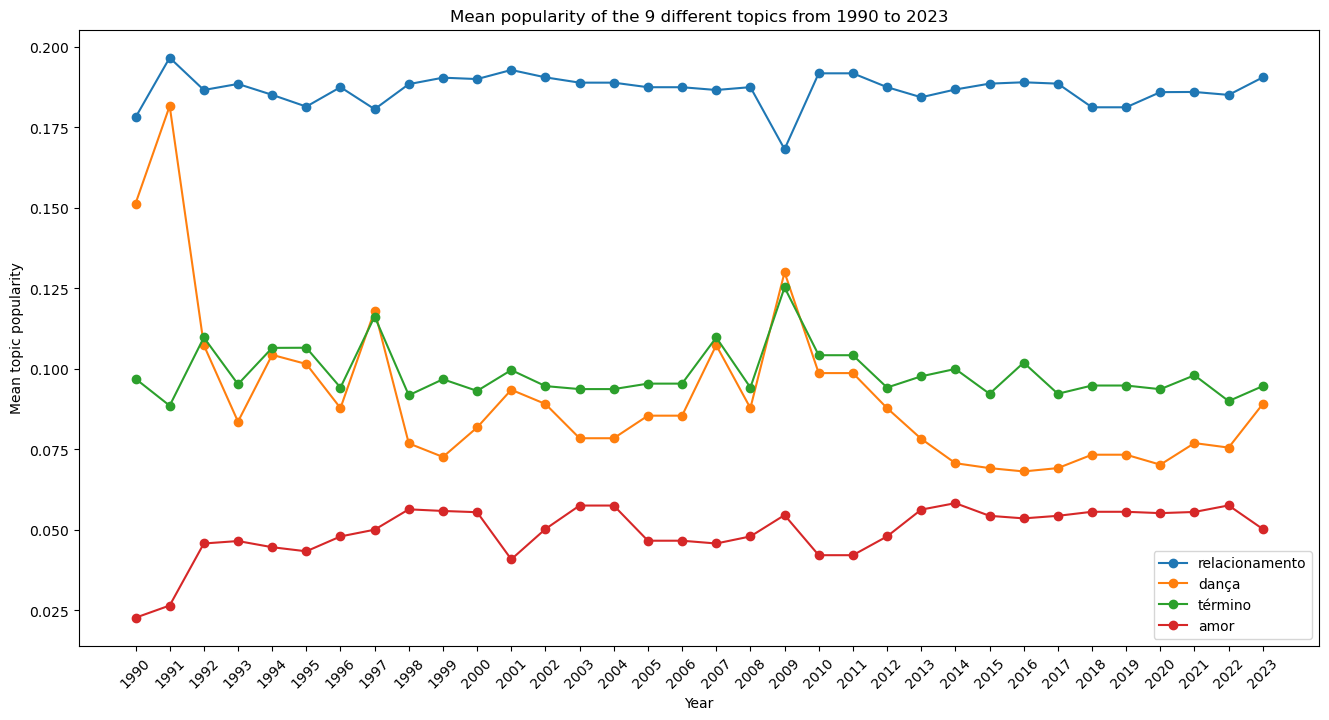

In [20]:
plot_topics_by_year(df, np.arange(1990,2024), columns, 'mean')

In [21]:
df[df['year'] == 1991].iloc[10]['clean_lyrics']

'pens fic mim reag dig fic sér sinal brig comig solid servir radical peg reg son pass pern dist férre marc dorm contig gal tom rol pass rev conduz visit gréc futur'

In [22]:
letra_djavan = 'pens fic mim reag dig fic sér sinal brig comig solid servir radical peg reg son pass pern dist férre marc dorm contig gal tom rol pass rev conduz visit gréc futur'.split()
count_djavan = 0
for word in letra_djavan:
    if word in tf_feature_names:
        count_djavan += 1

count_djavan

24

In [23]:
df[df['year'] == 1997]

,title,artist,lyrics,year,clean_lyrics,relacionamento,dança,término,amor
0,Palpite,Vanessa Rangel,Tô com saudade de você\nDebaixo do meu coberto...,1997,saudad cober suspir saudad varand quent fri ge...,0.259955,0.001324,0.162750,0.074422
1,Ralando o Tchan,É o Tchan,Essa é a mistura do Brasil com o Egito\nTem qu...,1997,mist brasil charm danç bonit mist brasil charm...,0.097031,0.010198,0.000000,0.000000
2,Toma Juízo,Zezé Di Camargo & Luciano,Hoje estou aqui\nVim falar de mim\nPreciso ref...,1997,vim fal mim precis refaz vid salv madrug decid...,0.455608,0.000000,0.150591,0.019521
3,Eu busco uma estrela,Gian e Giovani,No que está pensando\nPergunta meu coração\nEu...,1997,pens pergunt coraçã sonh prant despert trist s...,0.348376,0.021454,0.000000,0.000000
4,Conquista,Claudinho e Buchecha,"Sabe, Thurururu\nEstou louco pra te ver\nOh ye...",1997,thurururu ye cab thurururu quer thurururu ye c...,0.050067,0.104842,0.159836,0.143600
5,Mundo dos Sonhos,Katinguelê,Você não sabe mas eu te procuro há muito sonho...,1997,procur sonh român sonh desej felic mund sonh p...,0.280195,0.000000,0.045094,0.055412
6,2345meia78,Gabriel o Pensador,Fim de semana chegando e o coitado tá no osso\...,1997,seman cheg coit soluç coloc cadern bols fich c...,0.279009,0.000000,0.083533,0.000000
7,Nega Vá,É O Tchan,Quem nasceu pra você\nFui eu nêga\nVocê é minh...,1997,nasc nêg tod boqu nêg negu queix nêg pescoc nê...,0.193603,0.000000,0.013923,0.016778
8,Utopia,Art Popular,Pra se dizer\nQue a emoção\nVem depois da razã...,1997,ra coraçã morr paix renunci traz dor som solid...,0.289968,0.011137,0.164125,0.031723
9,Nobre Vagabundo,Daniela Mercury,Quanto tempo tenho pra matar essa saudade?\nMe...,1997,mat saudad ciúm pur vaidad fog traz respir res...,0.015669,0.204741,0.035478,0.000000


In [24]:
df[df['year'] == 1997].iloc[2]['clean_lyrics']

'vim fal mim precis refaz vid salv madrug decid cans metad corp mund tom cuid vid mud jog repent tom juíz consert gent tom cuid revert part tom juíz tir vid vim fal mim precis refaz vid salv madrug decid cans metad corp mund tom cuid vid mud jog repent tom juíz consert gent tom cuid revert part tom juíz tir vid'

In [25]:
len('vim fal mim precis refaz vid salv madrug decid cans metad corp mund tom cuid vid mud jog repent tom juíz consert gent tom cuid revert part tom juíz tir vid vim fal mim precis refaz vid salv madrug decid cans metad corp mund tom cuid vid mud jog repent tom juíz consert gent tom cuid revert part tom juíz tir vid'.split())

62

In [26]:
df[df['year'] == 2009]

,title,artist,lyrics,year,clean_lyrics,relacionamento,dança,término,amor
0,Chora Me Liga,João Bosco e Vinícius,Não era pra você se apaixonar\nEra só pra gent...,2009,gent fic sab paix fal fal fácil mão brinc cora...,0.259955,0.001324,0.162750,0.074422
1,Versos simples,Chimarruts,Sabe\nJá faz tempo\nQue eu queria te falar\nDa...,2009,quer fal cois trag peit saudad palavr cert jei...,0.097031,0.010198,0.000000,0.000000
2,Não tente me impedir,Bruno e Marrone,Dumdêrarium\nDumdêrarium\nDumdêrarium\n\nDumdê...,2009,dumdêrarium dumdêrarium dumdêrarium dumdêrariu...,0.455608,0.000000,0.150591,0.019521
3,A Lhe Esperar,Os Paralamas do Sucesso,Lá onde o vento vai dar\nOnde a nuvem beija o ...,2009,vent nuv beij mar fic mund profund pálpebr fec...,0.348376,0.021454,0.000000,0.000000
4,Me encontra,Charlie Brown Jr,Hoje eu vou sair para encontrar o amor\nQue es...,2009,sair rol vent mult don coraçã sorr chor compar...,0.050067,0.104842,0.159836,0.143600
5,Cadê Dalila,Ivete Sangalo,Are you ready? Vambora!\nMas eu tô vendo todo ...,2009,you ready vamb vend mund vend dalil cad dalil ...,0.280195,0.000000,0.045094,0.055412
6,Me Adora,Pitty,Tantas decepções eu já vivi\nAquela foi de lon...,2009,decepç viv cruel silênci profund decl desonr j...,0.279009,0.000000,0.083533,0.000000
7,Alguém Que Te Faz Sorrir,Fresno,Eu nunca consegui saber diferenciar\nNão quere...,2009,consegu diferenci quer sent merec fic cançã po...,0.193603,0.000000,0.013923,0.016778
8,Cartas pra você,NX Zero,Eu tento te esquecer\nMas tudo que eu escrevo ...,2009,tent fing precis precis cobr diss rest cart pa...,0.289968,0.011137,0.164125,0.031723
9,Daqui pra frente,NX Zero,Estou aqui pra dizer que eu jamais\nImaginei t...,2009,jamal sofr chor sofr jamal quil quil sent daqu...,0.015669,0.204741,0.035478,0.000000
